<a href="https://colab.research.google.com/github/mounisha123-ram/Employee-Attrition-Prediction/blob/main/project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **                 Employee Attrition Analysis and Prediction**

In [ ]:
#Employee Attrition Analysis and Prediction
#to run the code in vscode formula:
# & "C:\Users\LENOVO\Desktop\DataScience\Third Project\employee_attrition_streamlit\venv\Scripts\Activate.ps1"
# cd "employee_attrition_streamlit"
#streamlit run streamlit_app.py

#to create an env in vscode
python -m venv venv
venv\Scripts\activate
pip install streamlit
streamlit run app.py

In [ ]:
# Load your dataset
df = pd.read_csv('/content/Employee-Attrition - Employee-Attrition.csv')

# Standardize column names
df.columns = (
    df.columns
    .str.strip()                         # remove leading/trailing spaces
    .str.replace(r'([a-z])([A-Z])', r'\1_\2', regex=True)  # convert camelCase to snake_case
    .str.replace(' ', '_')              # replace spaces with underscore
    .str.lower()                        # convert to lowercase
)

# Drop constant/unnecessary columns like EmployeeCount, StandardHours, Over18
# Add this step earlier in the processing pipeline
# It's better to drop unnecessary columns before creating X
df.drop(['employee_count', 'standard_hours', 'over18','employee_number'], axis=1, inplace=True)

In [ ]:
from google.colab import files

# To download the dataframe as a CSV file
df.to_csv('employee_attrition.csv', index=False)

files.download('employee_attrition.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,3))
plt.rc("font", size=14)
sns.countplot(y ='attrition',data=df)
plt.show()

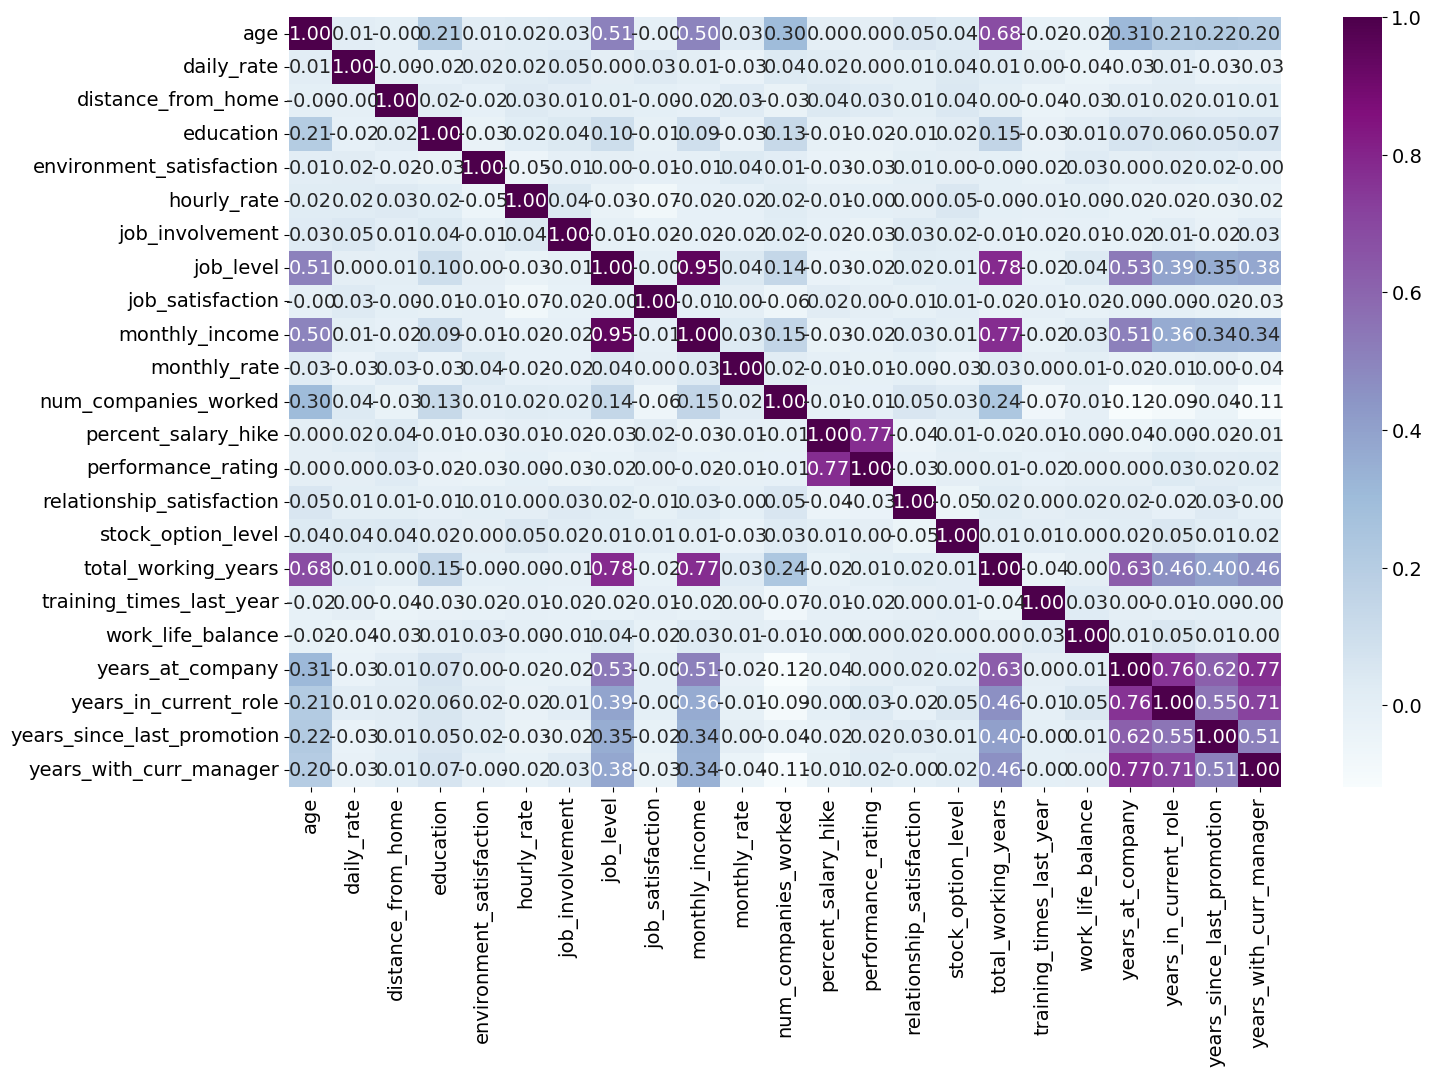

In [ ]:
# correlation for Numerical Data
import matplotlib.pyplot as plt
import seaborn as sns
features = ['age', 'daily_rate', 'distance_from_home', 'education',
       'environment_satisfaction', 'hourly_rate',
       'job_involvement', 'job_level', 'job_satisfaction', 'monthly_income',
       'monthly_rate', 'num_companies_worked', 'percent_salary_hike',
       'performance_rating', 'relationship_satisfaction', 'stock_option_level',
       'total_working_years', 'training_times_last_year', 'work_life_balance',
       'years_at_company', 'years_in_current_role',
       'years_since_last_promotion', 'years_with_curr_manager']
corr_= df[features].corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr_, annot=True, fmt = ".2f", cmap = "BuPu");

In [ ]:
#checking the Outliers:
import numpy as np
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
# Remove the target variable 'Attrition' and any identifier columns if present
numerical_cols = [col for col in numerical_cols if col not in ['attrition', 'employee_number']]
print("Numerical Columns:", numerical_cols)

Numerical Columns: ['age', 'daily_rate', 'distance_from_home', 'education', 'environment_satisfaction', 'hourly_rate', 'job_involvement', 'job_level', 'job_satisfaction', 'monthly_income', 'monthly_rate', 'num_companies_worked', 'percent_salary_hike', 'performance_rating', 'relationship_satisfaction', 'stock_option_level', 'total_working_years', 'training_times_last_year', 'work_life_balance', 'years_at_company', 'years_in_current_role', 'years_since_last_promotion', 'years_with_curr_manager']


In [ ]:
#checking the Outliers:
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns

fig = go.Figure() # Create a figure using plotly.graph_objects
fig = px.line(x=[1, 2, 3], y=[4, 5, 6])  # Create a figure using plotly.express

fig.show() # Display the figure

# using plotly.express for boxplots:
for col in numerical_cols:
    fig = px.box(df, y=col, title=f'Box Plot of {col}')
    fig.show()

# using plotly.express for histograms:
for col in numerical_cols:
    fig = px.histogram(df, x=col, title=f'Histogram of {col}', marginal="rug", nbins=30)
    fig.show()

In [ ]:
import warnings
warnings.filterwarnings('ignore')

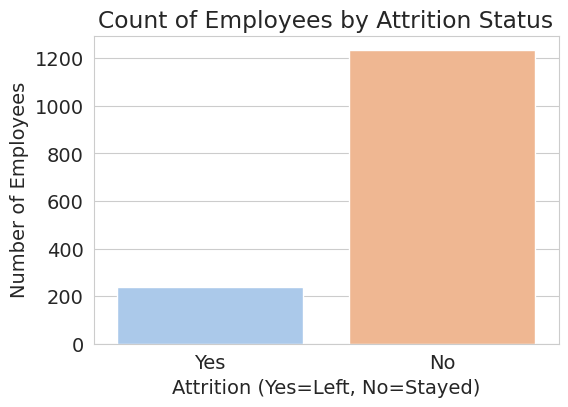

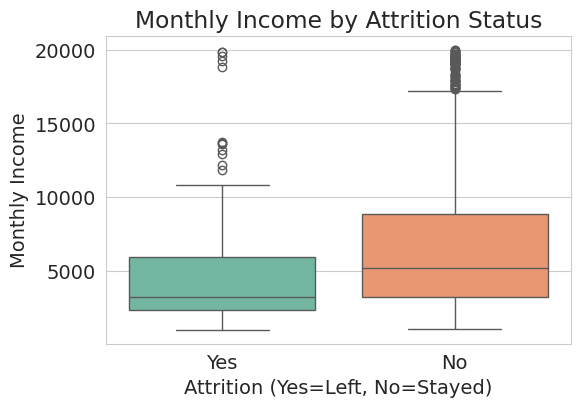

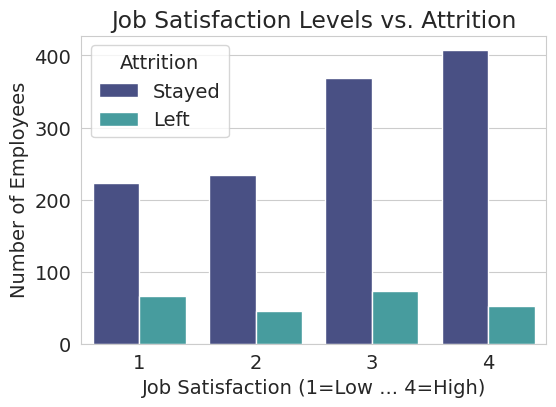

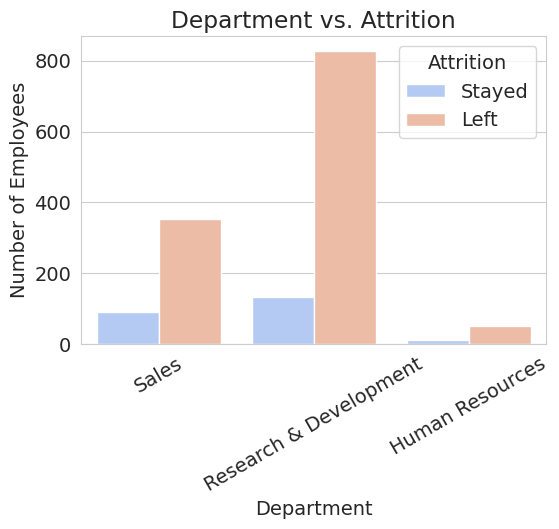

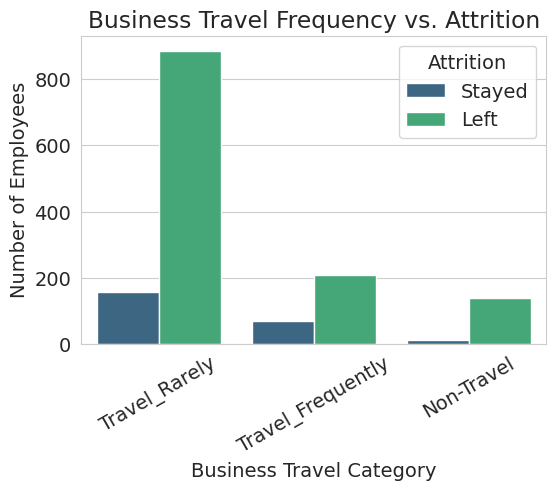

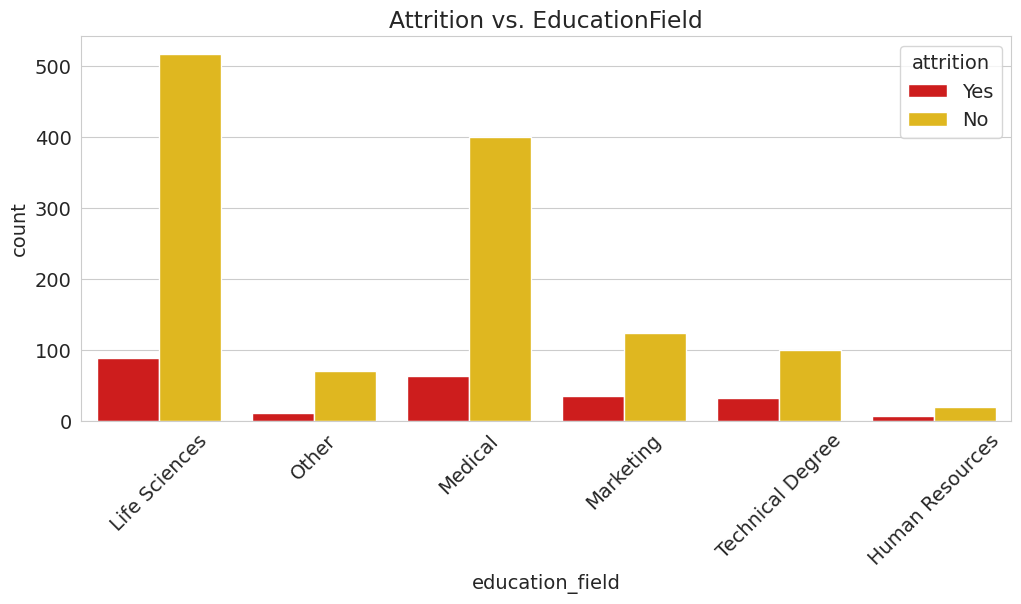

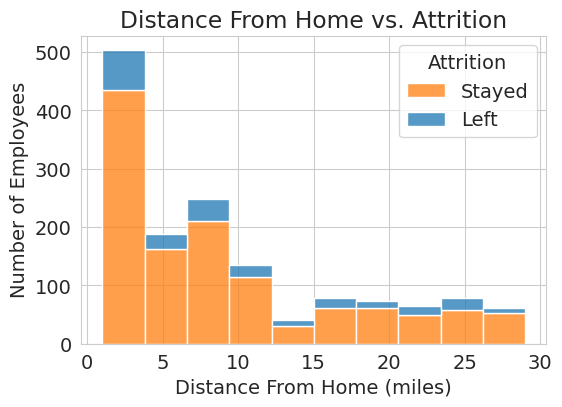

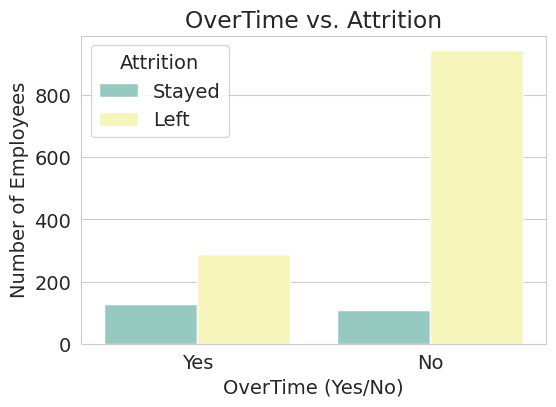

In [ ]:
#EDA
import seaborn as sns

sns.set_style('whitegrid')

# Attrition Countplot
plt.figure(figsize=(6,4))
sns.countplot(x='attrition', data=df, palette='pastel')
plt.title('Count of Employees by Attrition Status')
plt.xlabel('Attrition (Yes=Left, No=Stayed)')
plt.ylabel('Number of Employees')
plt.show()

# MonthlyIncome vs Attrition (Boxplot)
plt.figure(figsize=(6,4))
sns.boxplot(x='attrition', y='monthly_income', data=df, palette='Set2')
plt.title('Monthly Income by Attrition Status')
plt.xlabel('Attrition (Yes=Left, No=Stayed)')
plt.ylabel('Monthly Income')
plt.show()

# JobSatisfaction vs Attrition (Countplot)
plt.figure(figsize=(6,4))
sns.countplot(x='job_satisfaction', hue='attrition', data=df, palette='mako')
plt.title('Job Satisfaction Levels vs. Attrition')
plt.xlabel('Job Satisfaction (1=Low ... 4=High)')
plt.ylabel('Number of Employees')
plt.legend(title='Attrition', labels=['Stayed','Left'])
plt.show()

# Department vs Attrition (Countplot)
plt.figure(figsize=(6,4))
sns.countplot(x='department', hue='attrition', data=df, palette='coolwarm')
plt.title('Department vs. Attrition')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.legend(title='Attrition', labels=['Stayed','Left'])
plt.xticks(rotation=30)
plt.show()

# BusinessTravel vs Attrition (Countplot)
plt.figure(figsize=(6,4))
sns.countplot(x='business_travel', hue='attrition', data=df, palette='viridis')
plt.title('Business Travel Frequency vs. Attrition')
plt.xlabel('Business Travel Category')
plt.ylabel('Number of Employees')
plt.legend(title='Attrition', labels=['Stayed','Left'])
plt.xticks(rotation=30)
plt.show()

# Department vs Attrition
plt.figure(figsize=(12,5))
sns.countplot(x='education_field',hue='attrition', data=df, palette='hot')
plt.title("Attrition vs. EducationField")
plt.xticks(rotation=45)
plt.show()

# DistanceFromHome vs Attrition (Histogram)
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='distance_from_home', hue='attrition', multiple='stack', bins=10)
plt.title('Distance From Home vs. Attrition')
plt.xlabel('Distance From Home (miles)')
plt.ylabel('Number of Employees')
plt.legend(title='Attrition', labels=['Stayed','Left'])
plt.show()

# OverTime vs Attrition (Countplot)
plt.figure(figsize=(6,4))
sns.countplot(x='over_time', hue='attrition', data=df, palette='Set3')
plt.title('OverTime vs. Attrition')
plt.xlabel('OverTime (Yes/No)')
plt.ylabel('Number of Employees')
plt.legend(title='Attrition', labels=['Stayed','Left'])
plt.show()

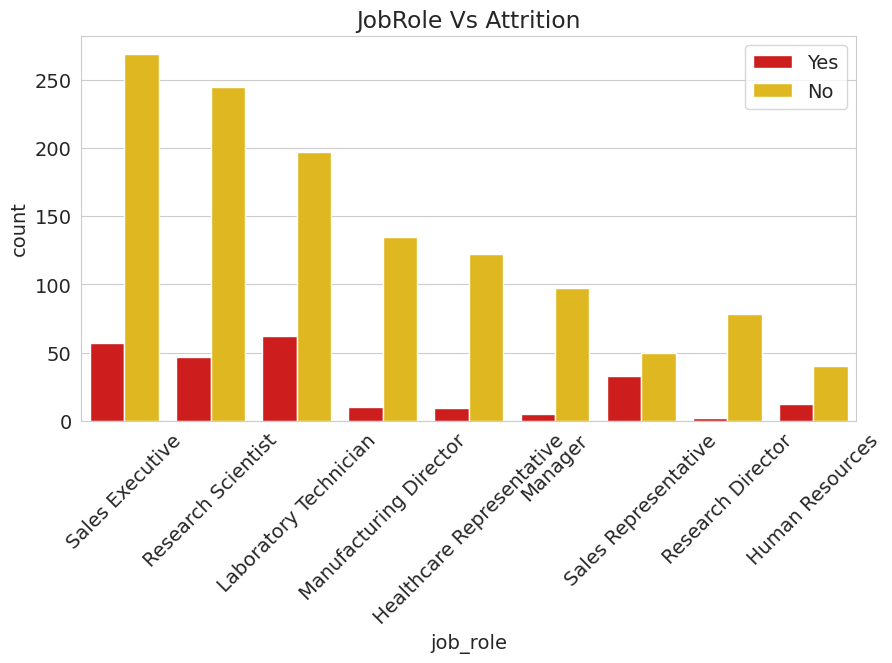

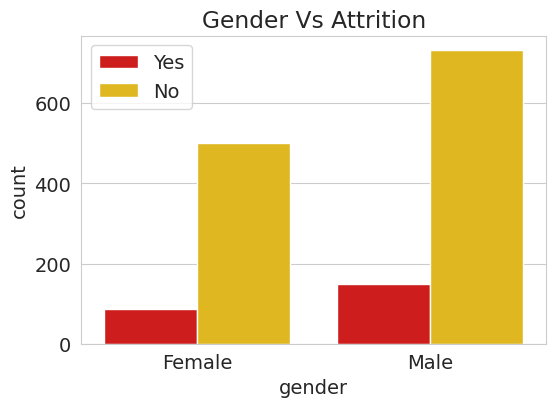

In [ ]:
#JobRole
plt.figure(figsize=(10,5))
sns.countplot(x='job_role',hue='attrition', data=df, palette='hot')
plt.title("JobRole Vs Attrition")
plt.legend(loc='best')
plt.xticks(rotation=45)
plt.show()

# Gender Vs Attrition
plt.figure(figsize=(6,4))
sns.countplot(x='gender',hue='attrition', data=df, palette='hot')
plt.title("Gender Vs Attrition")
plt.legend(loc='best')
plt.show()

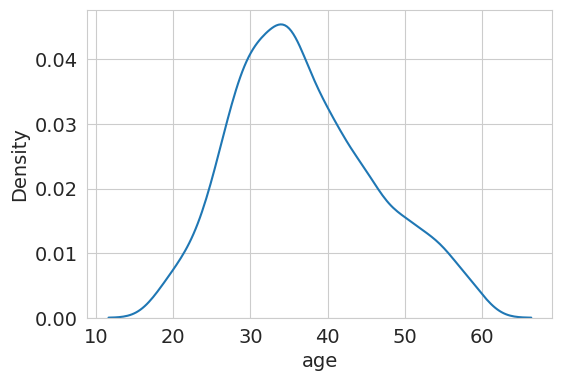

In [ ]:
# distribution of age
plt.figure(figsize=(6,4))
sns.distplot(df['age'],hist=False)
plt.show()

In [ ]:
ordinal_features = ['education','environment_satisfaction','job_involvement','job_satisfaction',
                    'performance_rating','relationship_satisfaction','work_life_balance']
df[ordinal_features].head()

,education,environment_satisfaction,job_involvement,job_satisfaction,performance_rating,relationship_satisfaction,work_life_balance
0,2,2,3,4,3,1,1
1,1,3,2,2,4,4,3
2,2,4,2,3,3,2,3
3,4,4,3,3,3,3,3
4,1,1,3,2,3,4,3


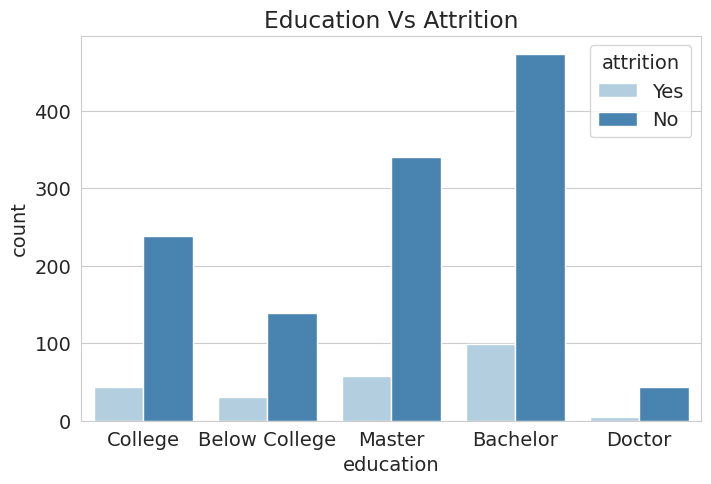

In [ ]:
edu_map = {1 :'Below College', 2: 'College', 3 :'Bachelor', 4 :'Master', 5: 'Doctor'}
plt.figure(figsize=(8,5))
sns.countplot(x=df['education'].map(edu_map), hue='attrition', data=df, palette='Blues')
plt.title("Education Vs Attrition")
plt.show()

Sri Pinnaivaali Amman thunai
Valumuniyar thunai
Murugar thunai......

In [ ]:
import pandas as pd
df=pd.read_csv('/content/Employee-Attrition - Employee-Attrition.csv')

In [ ]:
pd.set_option('display.max_columns', None)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [ ]:
df.shape

(1470, 35)

In [ ]:
#Data Preprocessing

# Standardize column names
df.columns = (
    df.columns
    .str.strip()                         # remove leading/trailing spaces
    .str.replace(r'([a-z])([A-Z])', r'\1_\2', regex=True)  # convert camelCase to snake_case
    .str.replace(' ', '_')              # replace spaces with underscore
    .str.lower()                        # convert to lowercase
)
df.columns

#Drop constant/unnecessary columns like EmployeeCount, StandardHours, Over18
#checking the columns have single entries
df['employee_count'].unique()
df['over18'].unique()
df['standard_hours'].unique()
df['employee_number'].unique()

# Drop constant/unnecessary columns
df.drop(['employee_count', 'standard_hours', 'over18','employee_number'], axis=1, inplace=True)

In [ ]:
df.shape

(1470, 31)

In [ ]:
df.dtypes

,0
age,int64
attrition,object
business_travel,object
daily_rate,int64
department,object
distance_from_home,int64
education,int64
education_field,object
environment_satisfaction,int64
gender,object


In [ ]:
df.select_dtypes(exclude=['int64',"float64"]).columns

Index(['attrition', 'business_travel', 'department', 'education_field',
       'gender', 'job_role', 'marital_status', 'over_time'],
      dtype='object')

In [ ]:
df.select_dtypes(exclude=['int64',"float64"])

,attrition,business_travel,department,education_field,gender,job_role,marital_status,over_time
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No
...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,No


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Categorical columns to encode
cat_cols = ['attrition', 'business_travel', 'department', 'education_field',
            'gender', 'job_role', 'marital_status', 'over_time']

# Apply Label Encoding directly on df
le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [ ]:
df.head(5)

,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager
0,41,1,2,1102,2,1,2,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,56,3,1,6,3,1,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,40,3,1,2,2,1,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


In [ ]:
# 1. Tenure Category based on years_at_company
df['tenure_category'] = pd.cut(
    df['years_at_company'],
    bins=[0, 2, 5, 10, df['years_at_company'].max()],
    labels=['<2 yrs', '2-5 yrs', '5-10 yrs', '10+ yrs'],
    include_lowest=True,
    right=False # Include the left edge, exclude the right edge
)

# 2. Engagement Score: weighted combination of satisfaction metrics
df['engagement_score'] = (
    0.4 * df['job_satisfaction'] +
    0.3 * df['job_involvement'] +
    0.2 * df['work_life_balance'] +
    0.1 * df['relationship_satisfaction']
)

# 3. Performance × Tenure Interaction
df['performance_tenure'] = df['performance_rating'] * df['years_at_company']


# ✅ Check the new columns
df[['tenure_category', 'engagement_score', 'performance_tenure']].head()

,tenure_category,engagement_score,performance_tenure
0,5-10 yrs,2.8,18
1,10+ yrs,2.4,40
2,<2 yrs,2.6,0
3,5-10 yrs,3.0,24
4,2-5 yrs,2.7,6


In [ ]:
df.dtypes

,0
age,int64
attrition,int64
business_travel,int64
daily_rate,int64
department,int64
distance_from_home,int64
education,int64
education_field,int64
environment_satisfaction,int64
gender,int64


In [ ]:
df['tenure_category'] = LabelEncoder().fit_transform(df['tenure_category'])

In [ ]:
df.head()

,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager,tenure_category,engagement_score,performance_tenure
0,41,1,2,1102,2,1,2,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,2,2.8,18
1,49,0,1,279,1,8,1,1,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,0,2.4,40
2,37,1,2,1373,1,2,2,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,3,2.6,0
3,33,0,1,1392,1,3,4,1,4,0,56,3,1,6,3,1,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,2,3.0,24
4,27,0,2,591,1,2,1,3,1,1,40,3,1,2,2,1,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2,1,2.7,6


In [ ]:
#Full Code
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load your dataset
df = pd.read_csv('/content/Employee-Attrition - Employee-Attrition.csv')

# Standardize column names
df.columns = (
    df.columns
    .str.strip()                         # remove leading/trailing spaces
    .str.replace(r'([a-z])([A-Z])', r'\1_\2', regex=True)  # convert camelCase to snake_case
    .str.replace(' ', '_')              # replace spaces with underscore
    .str.lower()                        # convert to lowercase
)

# Drop constant/unnecessary columns like EmployeeCount, StandardHours, Over18
# Add this step earlier in the processing pipeline
# It's better to drop unnecessary columns before creating X
df.drop(['employee_count', 'standard_hours', 'over18','employee_number'], axis=1, inplace=True)


# Categorical columns to encode using LabelEncoder
# Ensure 'over_time' is included and handled before scaling
cat_cols_to_encode = ['attrition', 'business_travel', 'department', 'education_field',
                      'gender', 'job_role', 'marital_status', 'over_time']

# Apply Label Encoding directly on df for specified columns
le = LabelEncoder()

for col in cat_cols_to_encode:
    # Check if the column exists before trying to encode it (optional, but good practice)
    if col in df.columns:
        # Check if the column is of object type before encoding
        if df[col].dtype == 'object':
            df[col] = le.fit_transform(df[col])
        else:
             print(f"Warning: Column '{col}' is not of object dtype and will not be label encoded.")
    else:
        print(f"Warning: Column '{col}' not found in the DataFrame.")


# 1. Tenure Category based on years_at_company
# Create the column first
df['tenure_category'] = pd.cut(
    df['years_at_company'],
    bins=[0, 2, 5, 10, df['years_at_company'].max()],
    labels=['<2 yrs', '2-5 yrs', '5-10 yrs', '10+ yrs'],
    include_lowest=True,
    right=False # Include the left edge, exclude the right edge
)

# Then label encode the tenure_category column
# This needs to be done after creating the column with string labels
df['tenure_category'] = LabelEncoder().fit_transform(df['tenure_category'])


# 2. Engagement Score: weighted combination of satisfaction metrics
df['engagement_score'] = (
    0.4 * df['job_satisfaction'] +
    0.3 * df['job_involvement'] +
    0.2 * df['work_life_balance'] +
    0.1 * df['relationship_satisfaction']
)

# 3. Performance × Tenure Interaction
df['performance_tenure'] = df['performance_rating'] * df['years_at_company']


# ✅ Check the new columns and first few rows to ensure they are numerical
print(df[['tenure_category', 'engagement_score', 'performance_tenure']].head())
print(df.head())
print(df.dtypes) # Check data types of all columns

   tenure_category  engagement_score  performance_tenure
0                2              2.80                  18
1                0              2.40                  40
2                3              2.60                   0
3                2              3.00                  24
4                1              2.70                   6
   age  attrition  business_travel  daily_rate  department  \
0   41          1                2        1102           2   
1   49          0                1         279           1   
2   37          1                2        1373           1   
3   33          0                1        1392           1   
4   27          0                2         591           1   

   distance_from_home  education  education_field  environment_satisfaction  \
0                   1          2                1                         2   
1                   8          1                1                         3   
2                   2          2                

In [ ]:
df.shape

(1470, 34)

In [ ]:
# 🔹 1. Split features and target
X = df.drop('attrition', axis=1)  # Drop target column from features
y = df['attrition']               # Target column

# Save column names for input order
columns = X.columns

import pickle

# Save it to a file
with open('input_columns.pkl', 'wb') as f:
    pickle.dump(columns, f)

# 🔹 2. Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 🔹 3. Handle Imbalance using SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# 🔹 4. Train-Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# ✅ Ready for model training!
print("Training shape:", X_train.shape)
print("Testing shape :", X_test.shape)

Training shape: (1972, 33)
Testing shape : (494, 33)


In [ ]:
y.value_counts()

,count
attrition,
0,1233
1,237


In [ ]:
# Before SMOTE
print("Before SMOTE:\n", y.value_counts())

# After SMOTE
from collections import Counter
print("After SMOTE:\n", Counter(y_resampled))

Before SMOTE:
 attrition
0    1233
1     237
Name: count, dtype: int64
After SMOTE:
 Counter({1: 1233, 0: 1233})


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 🔹 1. Build and train the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# 🔹 2. Make predictions
y_pred = rf_model.predict(X_test)

# 🔹 3. Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9271255060728745

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       247
           1       0.95      0.90      0.93       247

    accuracy                           0.93       494
   macro avg       0.93      0.93      0.93       494
weighted avg       0.93      0.93      0.93       494


Confusion Matrix:
 [[235  12]
 [ 24 223]]


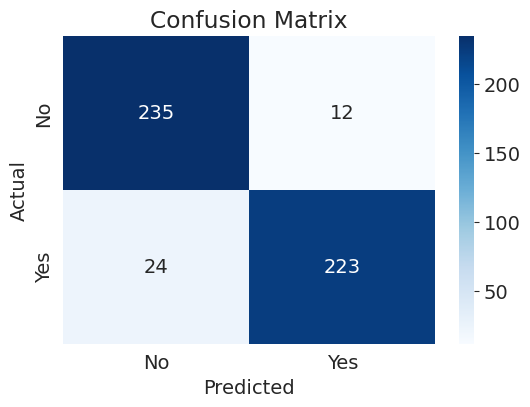

🔹 AUC-ROC Score: 0.9693241980691373


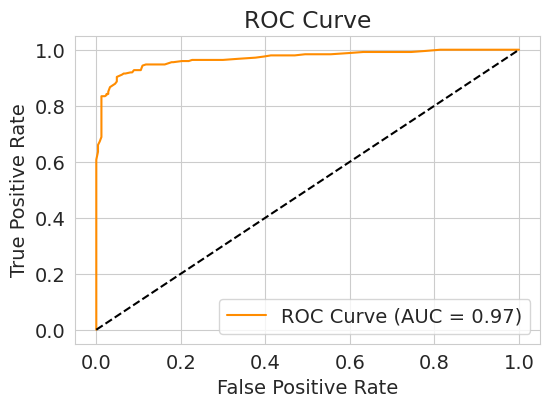

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

#Confusion Matrix (with visualization)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#AUC-ROC Score and Curve
#AUC-ROC (Area Under the Curve - Receiver Operating Characteristic):
# If y is binary (e.g., 0 or 1), use predict_proba to get probabilities
y_prob = rf_model.predict_proba(X_test)[:, 1]

# Calculate AUC Score
roc_auc = roc_auc_score(y_test, y_prob)
print("🔹 AUC-ROC Score:", roc_auc)

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [ ]:
#Cross Validation
from sklearn.model_selection import cross_val_score
import numpy as np

# Apply 5-Fold Cross-Validation
cv_scores = cross_val_score(rf_model, X_resampled, y_resampled, cv=5, scoring='accuracy')

# Print average accuracy and standard deviation
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))
print("Standard Deviation:", np.std(cv_scores))

Cross-Validation Scores: [0.78340081 0.97971602 0.97160243 0.97160243 0.97565923]
Mean Accuracy: 0.9363961862840906
Standard Deviation: 0.07655682847052311


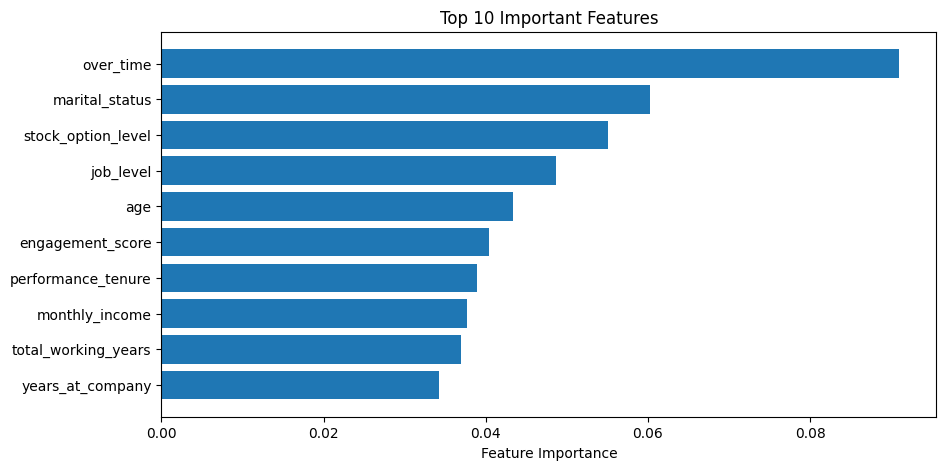

In [ ]:
#Feature Impoortance
import matplotlib.pyplot as plt
import numpy as np

importances = rf_model.feature_importances_
feature_names = df.drop('attrition', axis=1).columns

# Plot
indices = np.argsort(importances)[-10:]  # top 10 features
plt.figure(figsize=(10, 5))
plt.title("Top 10 Important Features")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Feature Importance")
plt.show()


🔹 Top Feature Importances:
                 Feature  Importance
18            over_time    0.091023
14       marital_status    0.060258
22   stock_option_level    0.055072
11            job_level    0.048729
0                   age    0.043307
31     engagement_score    0.040360
32   performance_tenure    0.038904
15       monthly_income    0.037635
23  total_working_years    0.036919
26     years_at_company    0.034261

🔹 Top 7 Important Features: ['over_time' 'marital_status' 'stock_option_level' 'job_level' 'age'
 'engagement_score' 'performance_tenure']


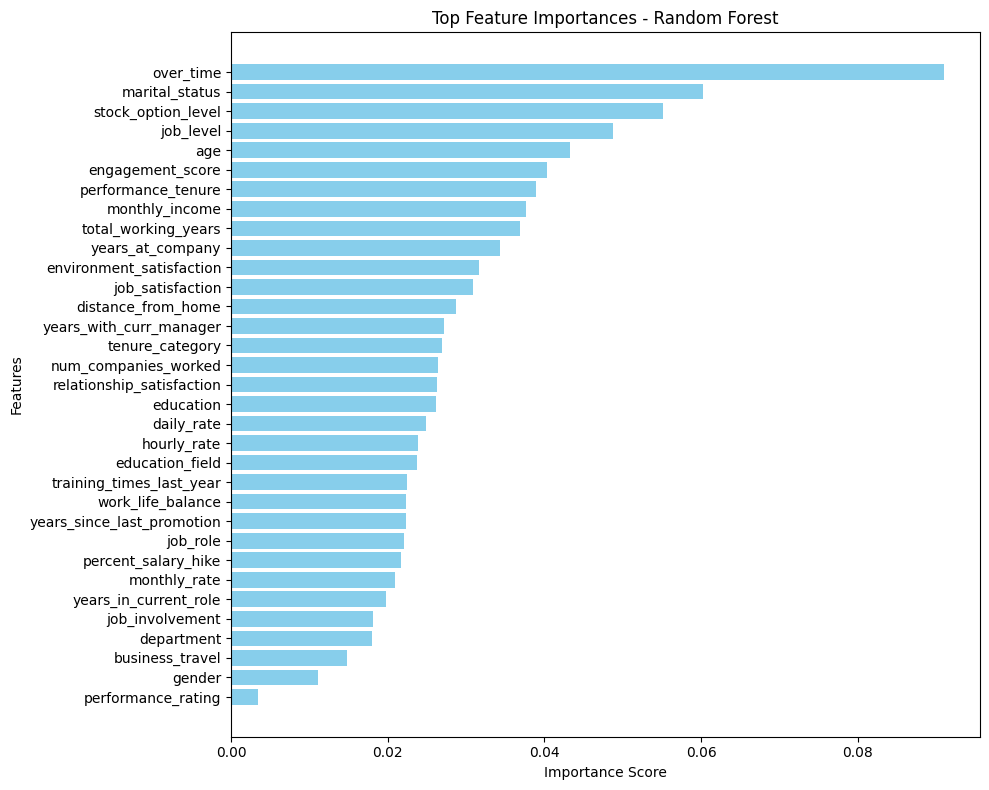

In [ ]:
# 🔹 1. Get feature importances from trained model
importances = rf_model.feature_importances_

# Get feature names from the original DataFrame X before scaling
feature_names = X.columns

# 🔹 2. Create DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,  # Use the feature names from the original DataFrame
    'Importance': importances
})

# 🔹 3. Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# 🔹 4. Print top feature importances
print("🔹 Top Feature Importances:\n", feature_importance_df.head(10))

# 🔹 5. Get top 7 feature names (as you were trying to do)
top_features = feature_importance_df['Feature'].values[:7]
print("\n🔹 Top 7 Important Features:", top_features)

# 🔹 6. Plot all feature importances (or just top 15)
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Top Feature Importances - Random Forest')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [ ]:
import pickle

# Save the model and scaler
with open('rf_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

from google.colab import files
files.download('rf_model.pkl')
files.download('scaler.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install lazypredict

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.0/29.0 MB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 32.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 722.9/722.9 kB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.0/119.0 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.9/194.9 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62

In [ ]:
#Lazy Predict
from lazypredict.Supervised import LazyClassifier

# Initialize LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

# Fit and compare models
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# Show results
print(models)


  0%|          | 0/32 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 986, number of negative: 986
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000809 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7394
[LightGBM] [Info] Number of data points in the train set: 1972, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
ExtraTreesClassifier               0.94               0.94     0.94      0.94   
LGBMClassifier                     0.93               0.93     0.93      0.93   
RandomForestClassifier             0.93               0.93     0.93      0.93   
XGBClassifier                      0.93               0.93     0.93      0.93   
SVC                                0.91               0.91     0.91      0.91   

In [ ]:
#Tuning RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

# Define random search space
param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
    'bootstrap': [True, False]
}

# Set up RandomizedSearchCV
rf = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,           # Try 20 different combinations
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# Fit the random search model
random_search.fit(X_train, y_train)

# Best result
print("Best Parameters:", random_search.best_params_)

# Evaluate on test set
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'bootstrap': False, 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 157}
Accuracy: 0.9331983805668016

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.96      0.94       247
           1       0.96      0.90      0.93       247

    accuracy                           0.93       494
   macro avg       0.93      0.93      0.93       494
weighted avg       0.93      0.93      0.93       494


Confusion Matrix:
 [[238   9]
 [ 24 223]]


In [ ]:
#Full code

#Full Code
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load your dataset
df = pd.read_csv('/content/Employee-Attrition - Employee-Attrition.csv')

# Standardize column names
df.columns = (
    df.columns
    .str.strip()                         # remove leading/trailing spaces
    .str.replace(r'([a-z])([A-Z])', r'\1_\2', regex=True)  # convert camelCase to snake_case
    .str.replace(' ', '_')              # replace spaces with underscore
    .str.lower()                        # convert to lowercase
)

# Drop constant/unnecessary columns like EmployeeCount, StandardHours, Over18
# Add this step earlier in the processing pipeline
# It's better to drop unnecessary columns before creating X
df.drop(['employee_count', 'standard_hours', 'over18','employee_number'], axis=1, inplace=True)


# Categorical columns to encode using LabelEncoder
# Ensure 'over_time' is included and handled before scaling
cat_cols_to_encode = ['attrition', 'business_travel', 'department', 'education_field',
                      'gender', 'job_role', 'marital_status', 'over_time']

# Apply Label Encoding directly on df for specified columns
le = LabelEncoder()

for col in cat_cols_to_encode:
    # Check if the column exists before trying to encode it (optional, but good practice)
    if col in df.columns:
        # Check if the column is of object type before encoding
        if df[col].dtype == 'object':
            df[col] = le.fit_transform(df[col])
        else:
             print(f"Warning: Column '{col}' is not of object dtype and will not be label encoded.")
    else:
        print(f"Warning: Column '{col}' not found in the DataFrame.")


# 1. Tenure Category based on years_at_company
# Create the column first
df['tenure_category'] = pd.cut(
    df['years_at_company'],
    bins=[0, 2, 5, 10, df['years_at_company'].max()],
    labels=['<2 yrs', '2-5 yrs', '5-10 yrs', '10+ yrs'],
    include_lowest=True,
    right=False # Include the left edge, exclude the right edge
)

# Then label encode the tenure_category column
# This needs to be done after creating the column with string labels
df['tenure_category'] = LabelEncoder().fit_transform(df['tenure_category'])


# 2. Engagement Score: weighted combination of satisfaction metrics
df['engagement_score'] = (
    0.4 * df['job_satisfaction'] +
    0.3 * df['job_involvement'] +
    0.2 * df['work_life_balance'] +
    0.1 * df['relationship_satisfaction']
)

# 3. Performance × Tenure Interaction
df['performance_tenure'] = df['performance_rating'] * df['years_at_company']


# ✅ Check the new columns and first few rows to ensure they are numerical
print(df[['tenure_category', 'engagement_score', 'performance_tenure']].head())
print(df.head())
print(df.dtypes) # Check data types of all columns

# 🔹 1. Split features and target
X = df.drop('attrition', axis=1)  # Drop target column from features
y = df['attrition']               # Target column

# 🔹 2. Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 🔹 3. Handle Imbalance using SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# 🔹 4. Train-Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 🔹 1. Build and train the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# 🔹 2. Make predictions
y_pred = rf_model.predict(X_test)

# 🔹 3. Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


from sklearn.model_selection import cross_val_score
import numpy as np

# Apply 5-Fold Cross-Validation
cv_scores = cross_val_score(rf_model, X_resampled, y_resampled, cv=5, scoring='accuracy')

# Print average accuracy and standard deviation
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))
print("Standard Deviation:", np.std(cv_scores))


In [ ]:
import streamlit as st
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

st.set_page_config(page_title="Employee Attrition Predictor", layout="wide")
st.title("🧑‍💼 Employee Attrition Prediction App")

# Load model, scaler, and input columns
with open('rf_model.pkl', 'rb') as f:
    model = pickle.load(f)

with open('scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)

with open('input_columns.pkl', 'rb') as f:
    input_columns = pickle.load(f)

# Mapping dictionaries
business_travel_map = {"Non-Travel": 0, "Travel Frequently": 1, "Travel Rarely": 2}
department_map = {"Sales": 0, "Research & Development": 1, "Human Resources": 2}
education_field_map = {
    "Life Sciences": 0, "Medical": 1, "Marketing": 2,
    "Technical Degree": 3, "Human Resources": 4, "Other": 5
}
gender_map = {"Male": 0, "Female": 1}
marital_status_map = {"Single": 0, "Married": 1, "Divorced": 2}
over_time_map = {"No": 0, "Yes": 1}
job_role_map = {
    "Sales Executive": 0, "Research Scientist": 1, "Laboratory Technician": 2,
    "Manufacturing Director": 3, "Healthcare Representative": 4, "Manager": 5,
    "Sales Representative": 6, "Research Director": 7, "Human Resources": 8
}

# Form input
with st.form("prediction_form"):
    st.subheader("🔍 Enter Employee Information:")

    age = st.slider("Age", 18, 65)
    business_travel = business_travel_map[st.selectbox("Business Travel", list(business_travel_map.keys()))]
    daily_rate = st.number_input("Daily Rate", min_value=0)
    department = department_map[st.selectbox("Department", list(department_map.keys()))]
    distance_from_home = st.slider("Distance From Home", 0, 50)
    education = st.selectbox("Education Level (1–5)", [1, 2, 3, 4, 5])
    education_field = education_field_map[st.selectbox("Education Field", list(education_field_map.keys()))]
    environment_satisfaction = st.selectbox("Environment Satisfaction (1–4)", [1, 2, 3, 4])
    gender = gender_map[st.selectbox("Gender", list(gender_map.keys()))]
    hourly_rate = st.slider("Hourly Rate", 0, 100)
    job_involvement = st.selectbox("Job Involvement (1–4)", [1, 2, 3, 4])
    job_level = st.selectbox("Job Level", [1, 2, 3, 4, 5])
    job_role = job_role_map[st.selectbox("Job Role", list(job_role_map.keys()))]
    job_satisfaction = st.selectbox("Job Satisfaction (1–4)", [1, 2, 3, 4])
    marital_status = marital_status_map[st.selectbox("Marital Status", list(marital_status_map.keys()))]
    monthly_income = st.number_input("Monthly Income", min_value=0)
    monthly_rate = st.number_input("Monthly Rate", min_value=0)
    num_companies_worked = st.slider("Number of Companies Worked", 0, 10)
    over_time = over_time_map[st.selectbox("Over Time", list(over_time_map.keys()))]
    percent_salary_hike = st.slider("Percent Salary Hike", 0, 100)
    performance_rating = st.selectbox("Performance Rating (1–4)", [1, 2, 3, 4])
    relationship_satisfaction = st.selectbox("Relationship Satisfaction (1–4)", [1, 2, 3, 4])
    stock_option_level = st.selectbox("Stock Option Level", [0, 1, 2, 3])
    total_working_years = st.slider("Total Working Years", 0, 40)
    training_times_last_year = st.slider("Training Times Last Year", 0, 10)
    work_life_balance = st.selectbox("Work Life Balance (1–4)", [1, 2, 3, 4])
    years_at_company = st.slider("Years at Company", 0, 40)
    years_in_current_role = st.slider("Years in Current Role", 0, 20)
    years_since_last_promotion = st.slider("Years Since Last Promotion", 0, 20)
    years_with_curr_manager = st.slider("Years With Current Manager", 0, 20)

    submit = st.form_submit_button("Predict Attrition")

# Run prediction
if submit:
    tenure_category = pd.cut([years_at_company], bins=[0, 2, 5, 10, 100],
                             labels=['<2 yrs', '2-5 yrs', '5-10 yrs', '10+ yrs'],
                             right=False).codes[0]

    engagement_score = (0.4 * job_satisfaction +
                        0.3 * job_involvement +
                        0.2 * work_life_balance +
                        0.1 * relationship_satisfaction)

    performance_tenure = performance_rating * years_at_company

    input_dict = {
        'age': age, 'business_travel': business_travel, 'daily_rate': daily_rate,
        'department': department, 'distance_from_home': distance_from_home, 'education': education,
        'education_field': education_field, 'environment_satisfaction': environment_satisfaction,
        'gender': gender, 'hourly_rate': hourly_rate, 'job_involvement': job_involvement,
        'job_level': job_level, 'job_role': job_role, 'job_satisfaction': job_satisfaction,
        'marital_status': marital_status, 'monthly_income': monthly_income, 'monthly_rate': monthly_rate,
        'num_companies_worked': num_companies_worked, 'over_time': over_time,
        'percent_salary_hike': percent_salary_hike, 'performance_rating': performance_rating,
        'relationship_satisfaction': relationship_satisfaction, 'stock_option_level': stock_option_level,
        'total_working_years': total_working_years, 'training_times_last_year': training_times_last_year,
        'work_life_balance': work_life_balance, 'years_at_company': years_at_company,
        'years_in_current_role': years_in_current_role, 'years_since_last_promotion': years_since_last_promotion,
        'years_with_curr_manager': years_with_curr_manager, 'tenure_category': tenure_category,
        'engagement_score': engagement_score, 'performance_tenure': performance_tenure
    }

    input_df = pd.DataFrame([input_dict])
    input_df = input_df.reindex(columns=input_columns)

    scaled_input = scaler.transform(input_df)
    prediction = model.predict(scaled_input)[0]
    pred_proba = model.predict_proba(scaled_input)[0][prediction]

    st.markdown("### 🎯 Prediction Result:")
    if prediction == 1:
        st.error(f"⚠️ The model predicts this employee is **likely to leave**. (Confidence: {pred_proba:.2%})")
    else:
        st.success(f"✅ The model predicts this employee will **likely stay**. (Confidence: {pred_proba:.2%})")

    st.markdown("### 🔧 Feature Engineering Insights:")

    tenure_labels = ['<2 yrs', '2-5 yrs', '5-10 yrs', '10+ yrs']
    st.metric(label="Tenure Category", value=tenure_labels[tenure_category])
    st.metric(label="Engagement Score", value=f"{engagement_score:.2f}")

    if engagement_score < 2.0:
        engagement_level = "🔴 Low Engagement"
        engagement_color = "red"
    elif 2.0 <= engagement_score < 3.0:
        engagement_level = "🟡 Moderate Engagement"
        engagement_color = "orange"
    else:
        engagement_level = "🟢 High Engagement"
        engagement_color = "green"

    st.markdown(f"**Engagement Level:** <span style='color:{engagement_color}; font-size:16px'>{engagement_level}</span>", unsafe_allow_html=True)
    st.metric(label="Performance x Tenure", value=f"{performance_tenure:.2f}")

    st.markdown("#### Engagement Score Breakdown")
components = {
    "Job Satisfaction": job_satisfaction * 0.4,
    "Job Involvement": job_involvement * 0.3,
    "Work Life Balance": work_life_balance * 0.2,
    "Relationship Satisfaction": relationship_satisfaction * 0.1
}

fig, ax = plt.subplots(figsize=(3, 2))  # smaller size
sns.barplot(x=list(components.keys()), y=list(components.values()), color="#1f77b4", ax=ax)  # blue
ax.set_ylabel("Weighted Score", fontsize=8)
ax.set_ylim(0, 1.6)
ax.tick_params(axis='x', labelrotation=20, labelsize=7)
ax.tick_params(axis='y', labelsize=7)
ax.set_title("Component Contributions", fontsize=9)
fig.tight_layout()
st.pyplot(fig)


st.markdown("#### Performance x Tenure Components")
perf_tenure_df = pd.DataFrame({
    "Metric": ["Performance Rating", "Years at Company"],
    "Value": [performance_rating, years_at_company]
})

fig2, ax2 = plt.subplots(figsize=(2.8, 2))  # smaller size
sns.barplot(x="Metric", y="Value", data=perf_tenure_df, color="#1f77b4", ax=ax2)  # blue
ax2.set_ylim(0, max(perf_tenure_df["Value"]) + 1)
ax2.set_ylabel("Value", fontsize=8)
ax2.set_title("Performance Factors", fontsize=9)
ax2.tick_params(axis='x', labelsize=7)
ax2.tick_params(axis='y', labelsize=7)
fig2.tight_layout()
st.pyplot(fig2)


# **1. Predicting Employee Attrition (Turnover Prediction):**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
import pickle

# Load dataset
df = pd.read_csv('/content/Employee-Attrition - Employee-Attrition.csv')

# Standardize column names
df.columns = (
    df.columns
    .str.strip()
    .str.replace(r'([a-z])([A-Z])', r'\1_\2', regex=True)
    .str.replace(' ', '_')
    .str.lower()
)

# Select relevant columns with new names
features = ['age', 'department', 'monthly_income', 'job_satisfaction',
            'years_at_company', 'marital_status', 'over_time']
target = 'attrition'

data = df[features + [target]].copy()

# Encode target
data['attrition'] = data['attrition'].map({'Yes': 1, 'No': 0})

# Encode categorical variables
label_encoders = {}
categorical_cols = ['department', 'marital_status', 'over_time']

for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [ ]:
data.dtypes

,0
age,int64
department,int64
monthly_income,int64
job_satisfaction,int64
years_at_company,int64
marital_status,int64
over_time,int64
attrition,int64


In [ ]:
data.head()

,age,department,monthly_income,job_satisfaction,years_at_company,marital_status,over_time,attrition
0,41,2,5993,4,6,2,1,1
1,49,1,5130,2,10,1,0,0
2,37,1,2090,3,0,2,1,1
3,33,1,2909,3,8,1,1,0
4,27,1,3468,2,2,1,0,0


In [ ]:
data['attrition'].value_counts()

,count
attrition,
0,1233
1,237


In [ ]:
# Split data
X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

# Scale numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE to balance training data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)


In [ ]:
# Train Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_balanced, y_train_balanced)

# Evaluate model
y_pred = rf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, rf.predict_proba(X_test_scaled)[:, 1]))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       247
           1       0.40      0.36      0.38        47

    accuracy                           0.81       294
   macro avg       0.64      0.63      0.64       294
weighted avg       0.80      0.81      0.81       294

ROC AUC: 0.7306400206736153


Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.90      0.89       247
           1       0.40      0.36      0.38        47

    accuracy                           0.81       294
   macro avg       0.64      0.63      0.64       294
weighted avg       0.80      0.81      0.81       294

Accuracy Score: 0.8129251700680272
ROC AUC Score: 0.7306400206736153
Cross-Validation Accuracy Scores: [0.79240506 0.89873418 0.93147208 0.93654822 0.95177665]
Average CV Accuracy: 0.90218723896421


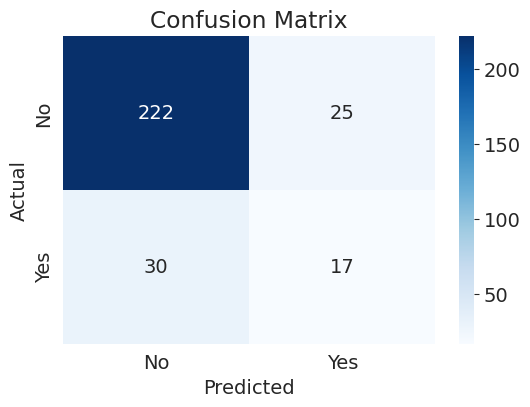

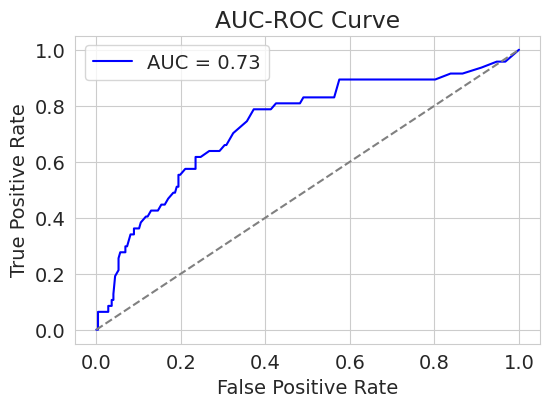

In [ ]:
# Evaluation: Classification report & accuracy
y_pred = rf.predict(X_test_scaled)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, rf.predict_proba(X_test_scaled)[:, 1]))

# Cross-validation (optional on original X_train)
cv_scores = cross_val_score(rf, X_train_balanced, y_train_balanced, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Average CV Accuracy:", cv_scores.mean())

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# AUC-ROC Curve
y_proba = rf.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_proba):.2f}', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Save trained model
with open('attrition_rf_model.pkl', 'wb') as f:
    pickle.dump(rf, f)

# Save scaler
with open('attrition_scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Save label encoders
with open('attrition_label_encoders.pkl', 'wb') as f:
    pickle.dump(label_encoders, f)

# Save features list
with open('attrition_input_columns.pkl', 'wb') as f:
    pickle.dump(features, f)

In [ ]:
#Lazy Predict
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train_balanced, X_test_scaled, y_train_balanced, y_test)

#View results
print(models)

  0%|          | 0/32 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 986, number of negative: 986
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000077 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1085
[LightGBM] [Info] Number of data points in the train set: 1972, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
AdaBoostClassifier                 0.78               0.77     0.77      0.80   
CalibratedClassifierCV             0.72               0.75     0.75      0.76   
LogisticRegression                 0.72               0.75     0.75      0.76   
LinearSVC                          0.72               0.75     0.75      0.76   
LinearDiscriminan

In [ ]:
#tuning
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter distributions
param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['sqrt', 'log2']
}

# Initialize Random Forest
rf = RandomForestClassifier(random_state=42)

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=50,  # Number of random combinations to try
    scoring='roc_auc',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit to the SMOTE-balanced training data
random_search.fit(X_train_balanced, y_train_balanced)

# Get the best model
best_rf_random = random_search.best_estimator_

# Evaluate the tuned model
y_pred = best_rf_random.predict(X_test_scaled)
print("Best Parameters from Random Search:", random_search.best_params_)
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, best_rf_random.predict_proba(X_test_scaled)[:, 1]))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters from Random Search: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 233}
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       247
           1       0.41      0.40      0.41        47

    accuracy                           0.81       294
   macro avg       0.65      0.65      0.65       294
weighted avg       0.81      0.81      0.81       294

ROC AUC: 0.7616504436213283


# **Predicting Performance Rating:**

In [12]:
import pandas as pd
# Load dataset
df = pd.read_csv('/content/Employee-Attrition - Employee-Attrition.csv')


In [ ]:
df.columns

Index(['age', 'attrition', 'business_travel', 'daily_rate', 'department',
       'distance_from_home', 'education', 'education_field', 'employee_count',
       'employee_number', 'environment_satisfaction', 'gender', 'hourly_rate',
       'job_involvement', 'job_level', 'job_role', 'job_satisfaction',
       'marital_status', 'monthly_income', 'monthly_rate',
       'num_companies_worked', 'over18', 'over_time', 'percent_salary_hike',
       'performance_rating', 'relationship_satisfaction', 'standard_hours',
       'stock_option_level', 'total_working_years', 'training_times_last_year',
       'work_life_balance', 'years_at_company', 'years_in_current_role',
       'years_since_last_promotion', 'years_with_curr_manager'],
      dtype='object')

In [ ]:
df['PerformanceRating'].unique()

array([3, 4])

In [ ]:
df['performance_rating'].value_counts()

,count
performance_rating,
3,1244
4,226


In [ ]:
df[['education',
    'job_involvement',
    'job_level',
    'monthly_income',
    'years_at_company',
    'years_in_current_role']].head()

,education,job_involvement,job_level,monthly_income,years_at_company,years_in_current_role
0,2,3,2,5993,6,4
1,1,2,2,5130,10,7
2,2,2,1,2090,0,0
3,4,3,1,2909,8,7
4,1,3,1,3468,2,2


Classification Report:
               precision    recall  f1-score   support

           3       0.86      0.93      0.89       249
           4       0.31      0.18      0.23        45

    accuracy                           0.81       294
   macro avg       0.58      0.55      0.56       294
weighted avg       0.78      0.81      0.79       294

Accuracy Score: 0.8129251700680272
Cross-Validation Accuracy Scores: [0.66080402 0.8919598  0.91457286 0.90452261 0.86934673]
Average CV Accuracy: 0.8482412060301506


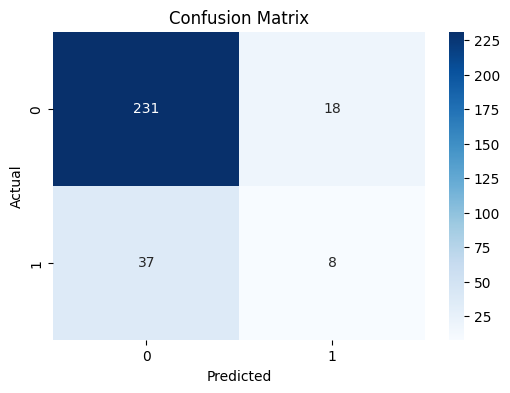

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    confusion_matrix,
    roc_auc_score,
    roc_curve
)
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('/content/Employee-Attrition - Employee-Attrition.csv')

# Standardize column names
df.columns = (
    df.columns
    .str.strip()
    .str.replace(r'([a-z])([A-Z])', r'\1_\2', regex=True)
    .str.replace(' ', '_')
    .str.lower()
)

# Define features and target
features = [
    'education',
    'job_involvement',
    'job_level',
    'monthly_income',
    'years_at_company',
    'years_in_current_role'
]
target = 'performance_rating'

# Prepare data
data = df[features + [target]].copy()
X = data[features]
y = data[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

# Train Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_balanced, y_train_balanced)

# Predictions
y_pred = rf.predict(X_test_scaled)

# Evaluation: Classification report & accuracy
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))



# Cross-validation (on balanced training set)
cv_scores = cross_val_score(rf, X_train_balanced, y_train_balanced, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Average CV Accuracy:", cv_scores.mean())

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [14]:
from sklearn.metrics import roc_auc_score
y_prob = rf.predict_proba(X_test_scaled)[:, 1]
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

ROC-AUC Score: 0.541008478357876


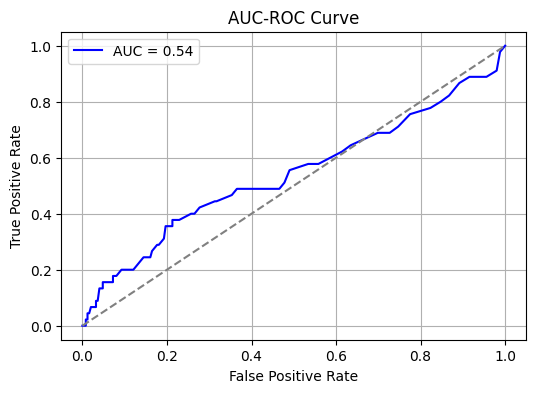

In [18]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class (class 4)
y_proba = rf.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve and AUC score
fpr, tpr, _ = roc_curve(y_test, y_proba, pos_label=4)
auc_score = roc_auc_score(y_test, y_proba)

# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import pickle # Import pickle here

# Optional: Save model and scaler
with open('performance_rating_model.pkl', 'wb') as f:
    # Use the best model from GridSearchCV if that was the intention
    pickle.dump(best_rf, f) # Assuming 'best_rf' from tuning is the desired model

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f) # Assuming 'scaler' from the scaling step is the desired scaler

print("Model and scaler saved successfully!")

Classification Report:
               precision    recall  f1-score   support

           3       0.86      0.93      0.89       249
           4       0.31      0.18      0.23        45

    accuracy                           0.81       294
   macro avg       0.58      0.55      0.56       294
weighted avg       0.78      0.81      0.79       294

Accuracy Score: 0.8129251700680272


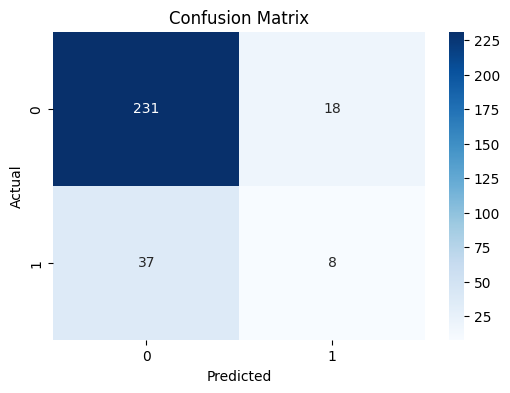

✅ Model, scaler, and features saved successfully!


In [1]:
# performance_model_train.ipynb (or .py for local use)

import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# Load dataset
df = pd.read_csv('/content/Employee-Attrition - Employee-Attrition.csv')

# Standardize column names
df.columns = (
    df.columns
    .str.strip()
    .str.replace(r'([a-z])([A-Z])', r'\1_\2', regex=True)
    .str.replace(' ', '_')
    .str.lower()
)

# Feature columns and target
features = [
    'education',
    'job_involvement',
    'job_level',
    'monthly_income',
    'years_at_company',
    'years_in_current_role'
]
target = 'performance_rating'

# Prepare data
X = df[features]
y = df[target]

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

# Train model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_balanced, y_train_balanced)

# Predict
y_pred = rf.predict(X_test_scaled)

# Evaluate
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ✅ Save model, scaler, and feature order
with open('performance_rating_model.pkl', 'wb') as f:
    pickle.dump(rf, f)

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

with open('features.pkl', 'wb') as f:
    pickle.dump(features, f)

print("✅ Model, scaler, and features saved successfully!")

Unique values in target (performance_rating): [3 4]
Value counts in target:
 performance_rating
3    1244
4     226
Name: count, dtype: int64

Class distribution after SMOTE: Counter({4: 995, 3: 995})

--- Baseline Random Forest ---
Classification Report:
               precision    recall  f1-score   support

           3       0.86      0.93      0.89       249
           4       0.31      0.18      0.23        45

    accuracy                           0.81       294
   macro avg       0.58      0.55      0.56       294
weighted avg       0.78      0.81      0.79       294

Accuracy Score: 0.8129251700680272
Cross-Validation Accuracy Scores: [0.66080402 0.8919598  0.91457286 0.90452261 0.86934673]
Average CV Accuracy: 0.8482412060301506


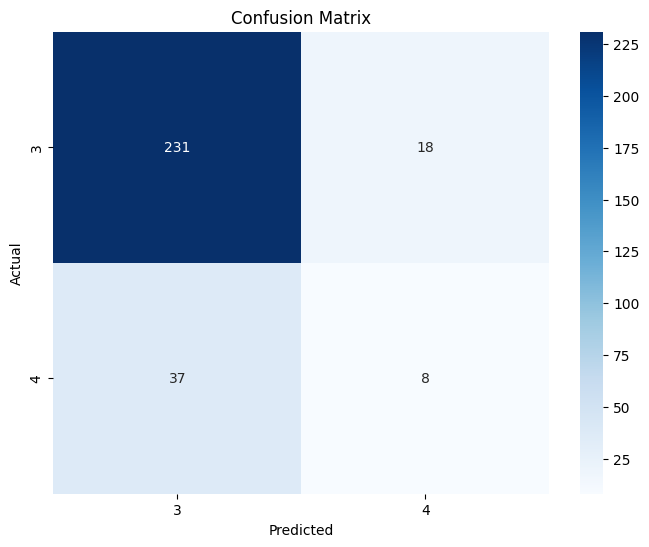


--- GridSearchCV for Hyperparameter Tuning ---
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}

Classification Report (Tuned Model):
               precision    recall  f1-score   support

           3       0.86      0.92      0.89       249
           4       0.29      0.18      0.22        45

    accuracy                           0.81       294
   macro avg       0.57      0.55      0.55       294
weighted avg       0.77      0.81      0.79       294

Accuracy Score (Tuned Model): 0.8061224489795918


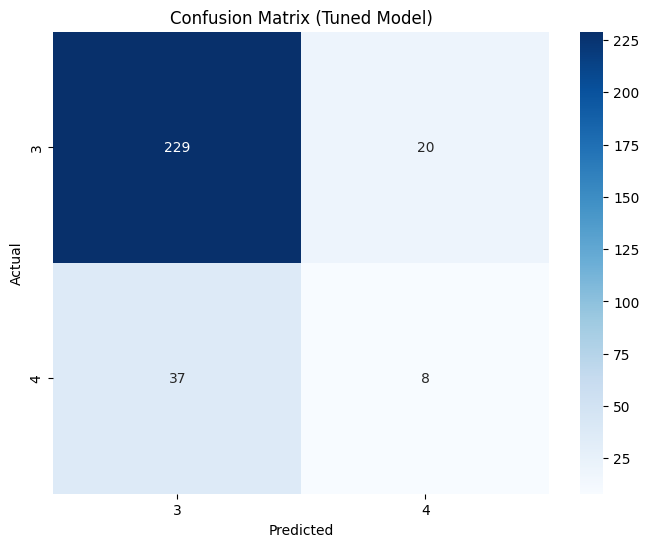

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    confusion_matrix,
    #roc_auc_score, # Removed binary ROC-AUC import
    #roc_curve      # Removed binary ROC-AUC import
)
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV # Import GridSearchCV
import numpy as np # Import numpy for mean of cross-val scores


# Load dataset
df = pd.read_csv('/content/Employee-Attrition - Employee-Attrition.csv')

# Standardize column names
df.columns = (
    df.columns
    .str.strip()
    .str.replace(r'([a-z])([A-Z])', r'\1_\2', regex=True)
    .str.replace(' ', '_')
    .str.lower()
)

# Define features and target
features = [
    'education',
    'job_involvement',
    'job_level',
    'monthly_income',
    'years_at_company',
    'years_in_current_role'
]
target = 'performance_rating'

# Prepare data
data = df[features + [target]].copy()
X = data[features]
y = data[target]

# Check unique values in the target after loading
print("Unique values in target (performance_rating):", y.unique())
print("Value counts in target:\n", y.value_counts())

# Train-test split
# stratify=y is important for multi-class to ensure representation of each class
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE (Handle imbalance - important for multi-class too)
# SMOTE can be used for multi-class, but be mindful of class distributions.
# If some classes are very small, SMOTE might not be ideal.
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

# Check class distribution after SMOTE
from collections import Counter
print("\nClass distribution after SMOTE:", Counter(y_train_balanced))


# --- Train and Evaluate Baseline Random Forest ---
print("\n--- Baseline Random Forest ---")
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_balanced, y_train_balanced)

# Predictions
y_pred = rf.predict(X_test_scaled)

# Evaluation: Classification report & accuracy (Appropriate for multi-class)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Cross-validation (on balanced training set)
cv_scores = cross_val_score(rf, X_train_balanced, y_train_balanced, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Average CV Accuracy:", np.mean(cv_scores)) # Use np.mean

# Confusion Matrix (Appropriate for multi-class)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6)) # Adjust size for multi-class matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y), yticklabels=np.unique(y)) # Use unique class labels
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# --- Hyperparameter Tuning with GridSearchCV ---
print("\n--- GridSearchCV for Hyperparameter Tuning ---")
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# Initialize Random Forest
# Use the same rf object or re-initialize
rf_gs = RandomForestClassifier(random_state=42)


# GridSearchCV
# Use an appropriate scoring metric for multi-class, e.g., 'accuracy', 'f1_macro', 'f1_weighted'
# 'accuracy' is often sufficient for overall performance in multi-class if classes aren't extremely skewed.
grid_search = GridSearchCV(
    estimator=rf_gs, # Use the new instance or rf
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring='accuracy', # Use accuracy or f1_weighted for multi-class
    verbose=2
)

# Fit the model on SMOTE-balanced and scaled data
grid_search.fit(X_train_balanced, y_train_balanced)

# Best model
best_rf = grid_search.best_estimator_

print("Best Parameters:", grid_search.best_params_)

# Predict on test data
y_pred = best_rf.predict(X_test_scaled)
# y_proba is not directly useful for standard ROC-AUC in multi-class

# Evaluation (Appropriate for multi-class)
print("\nClassification Report (Tuned Model):\n", classification_report(y_test, y_pred))
print("Accuracy Score (Tuned Model):", accuracy_score(y_test, y_pred))

# ROC AUC Score (Removed, as it's not applicable for standard multi-class)
# If you needed a form of multi-class AUC, you would need to calculate micro/macro averages,
# but the standard roc_auc_score function expects binary data.

# Confusion Matrix (Appropriate for multi-class)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6)) # Adjust size
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y), yticklabels=np.unique(y)) # Use unique class labels
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Tuned Model)')
plt.show()

In [3]:
!pip install lazypredict

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.0/29.0 MB 63.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 112.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 722.9/722.9 kB 45.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.0/119.0 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.9/194.9 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [23]:
#LazyPredict
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train_scaled, X_test_scaled, y_train, y_test)

# Display model performance
print(models)
#print(models.head())  # Top 5 performing models


  0%|          | 0/32 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 181, number of negative: 995
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000161 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 324
[LightGBM] [Info] Number of data points in the train set: 1176, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.153912 -> initscore=-1.704246
[LightGBM] [Info] Start training from score -1.704246
                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
BaggingClassifier                  0.82               0.54     0.54      0.79   
Perceptron                         0.73               0.52     0.52      0.74   
ExtraTreeClassifier                0.75               0.51     0.51      0.75   
KNeighborsClassifier               0.84               0.51     0.51      0.78   
RandomForestClassifier     